Financial Data Preprocessing

A time series is a series of data points indexed in time order. Financial Data such as equity, commodity, and forex price series observed at equally spaced points in time are an example of such a series. It is a sequence of data points observed at regular time intervals and depending on the frequency of observations, a time series may typically be in ticks, seconds, minutes, hourly, daily, weekly, monthly, quarterly and annual.

The first step towards any data analysis would be to parse the raw data that involves extracting the data from the source and then cleaning and filling the missing data if any. While data comes in many forms, Python makes it easy to read time-series data using useful packages.

In this session, we will retrieve and store both end-of-day and intraday data using some of the popular python packages. These libraries aim to keep the API simple and make it easier to access historical data. Further, we will see how to read data from traditional data sources stored locally.

In [ ]:
#load Libraries
import warnings
warnings.filterwarnings('ignore')

#import data manipulation libraries
import numpy as np
import pandas as pd

#import yahoo finance Libraries
import yfinance as yf

In [5]:
import yfinance as yf
from datetime import date, timedelta

# Calculate the start date (10 years ago from today)
end_date = date.today()
start_date = end_date - timedelta(days=365*10)  # 10 years

# Download the data. Use '10y' for the period
data = yf.download("AAPL", start=start_date, end=end_date, period="10y") 

# Display the first few rows (optional)
print(data.head())
print(data.tail())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-09-11  25.102501  25.360001  24.905001  25.357500  22.515108  249412400
2014-09-12  25.302500  25.547501  25.270000  25.415001  22.566164  250504400
2014-09-15  25.702499  25.762501  25.360001  25.407499  22.559505  245266000
2014-09-16  24.950001  25.315001  24.722500  25.215000  22.388584  267632400
2014-09-17  25.317499  25.450001  25.147499  25.395000  22.548403  243706000
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-08-30  230.190002  230.399994  227.479996  229.000000  229.000000   
2024-09-03  228.550003  229.000000  221.169998  222.770004  222.770004   
2024-09-04  221.660004  221.779999  217.479996  220.850006  220.850006   
2024-09-05  221.630005  225.479996  221.520004  222.380005  222.380005   
2024-09-06  223.9

In [6]:
# Fetch data for year to date (YTD)
df3 = yf.download("AAPL", period="ytd", progress=False)

# Display the last five rows of the dataframe to check the results. 
df3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800
2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50190600
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48388600


In [7]:
# Specify stocks
# https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
dow_stocks = ['UNH', 'GS', 'HD', 'AMGN', 'MCD']
dow_stocks

['UNH', 'GS', 'HD', 'AMGN', 'MCD']

In [8]:
# Fetch data for multiple stocks at once
df4 = yf.download(dow_stocks, period='ytd', progress=False)['Adj Close']

# Display dataframe
df4.tail()

Ticker,AMGN,GS,HD,MCD,UNH
Date,,,,,
2024-08-30 00:00:00+00:00,333.829987,510.250000,368.500000,286.990021,590.200012
2024-09-03 00:00:00+00:00,330.510010,487.459991,364.739990,285.519989,598.679993
2024-09-04 00:00:00+00:00,330.640015,490.640015,364.670013,288.029999,604.179993
2024-09-05 00:00:00+00:00,324.359985,487.880005,361.850006,287.970001,595.489990
2024-09-06 00:00:00+00:00,320.559998,479.609985,360.049988,289.510010,596.880005


In [9]:
# Group the stocks
df5 = yf.download(dow_stocks, start="2024-06-01", end="2024-06-30", group_by="ticker", progress=False)

In [10]:
df5.head()

Ticker                           AMGN                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2024-06-03 00:00:00+00:00  306.790009  311.480011  303.850006  307.420013   
2024-06-04 00:00:00+00:00  308.000000  310.920013  307.049988  307.369995   
2024-06-05 00:00:00+00:00  307.799988  310.309998  306.399994  307.380005   
2024-06-06 00:00:00+00:00  306.920013  310.010010  304.309998  305.690002   
2024-06-07 00:00:00+00:00  306.720001  307.959991  304.480011  305.019989   

Ticker                                                  GS              \
Price                       Adj Close   Volume        Open        High   
Date                                                                     
2024-06-03 00:00:00+00:00  305.294281  2447400  458.869995  458.869995   
2024-06-04 00:00:00+00:00  305.244598  1830200  450.500000  457.709991   
2024-06-05 00:00:00+00:00  305.254547  1748600  457.549988  463.019989   
2024-06-06 00:00:00+00:00  303.576233  1927900  461.820007  464.519989   
2024-06-07 00:00:00+00:00  302.910828  1925000  455.440002  461.160004   

Ticker                                             ...         UNH  \
Price                             Low       Close  ...         Low   
Date                                               ...               
2024-06-03 00:00:00+00:00  450.200012  454.980011  ...  493.070007   
2024-06-04 00:00:00+00:00  449.209991  455.299988  ...  494.589996   
2024-06-05 00:00:00+00:00  457.500000  461.679993  ...  498.799988   
2024-06-06 00:00:00+00:00  457.010010  458.100006  ...  497.279999   
2024-06-07 00:00:00+00:00  454.500000  454.910004  ...  490.420013   

Ticker                                                             MCD  \
Price                           Close   Adj Close   Volume        Open   
Date                                                                     
2024-06-03 00:00:00+00:00  497.440002  495.338623  2795100  257.929993   
2024-06-04 00:00:00+00:00  505.489990  503.354614  3178400  259.339996   
2024-06-05 00:00:00+00:00  503.119995  500.994629  2464400  261.500000   
2024-06-06 00:00:00+00:00  501.920013  499.799713  2419600  260.910004   
2024-06-07 00:00:00+00:00  490.690002  488.617157  3416300  260.070007   

Ticker                                                                     \
Price                            High         Low       Close   Adj Close   
Date                                                                        
2024-06-03 00:00:00+00:00  259.950012  255.600006  259.750000  258.247253   
2024-06-04 00:00:00+00:00  263.089996  259.250000  262.720001  261.200073   
2024-06-05 00:00:00+00:00  261.739990  258.660004  259.989990  258.485870   
2024-06-06 00:00:00+00:00  261.790009  258.929993  260.720001  259.211639   
2024-06-07 00:00:00+00:00  261.399994  255.339996  256.209991  254.727722   

Ticker                              
Price                       Volume  
Date                                
2024-06-03 00:00:00+00:00  4342800  
2024-06-04 00:00:00+00:00  4592700  
2024-06-05 00:00:00+00:00  4136800  
2024-06-06 00:00:00+00:00  3354300  
2024-06-07 00:00:00+00:00  2290100  

[5 rows x 30 columns]

In [11]:
# Display GS stock data
df5['GS']

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03 00:00:00+00:00,458.869995,458.869995,450.200012,454.980011,452.304199,1930700
2024-06-04 00:00:00+00:00,450.500000,457.709991,449.209991,455.299988,452.622284,1835000
2024-06-05 00:00:00+00:00,457.549988,463.019989,457.500000,461.679993,458.964752,1678900
2024-06-06 00:00:00+00:00,461.820007,464.519989,457.010010,458.100006,455.405823,1598000
2024-06-07 00:00:00+00:00,455.440002,461.160004,454.500000,454.910004,452.234589,1736100
2024-06-10 00:00:00+00:00,452.329987,455.359985,450.299988,453.549988,450.882568,1698600
2024-06-11 00:00:00+00:00,451.040009,451.859985,443.380005,444.269989,441.657166,1938200
2024-06-12 00:00:00+00:00,455.600006,457.640015,446.190002,448.700012,446.061127,1733000
2024-06-13 00:00:00+00:00,446.730011,448.320007,442.149994,446.350006,443.724945,1849100


In [12]:
# Retrieve intraday data for last five days
df6 = yf.download('AAPL', period='5d', interval='1m', progress=False)

# Display dataframe
df6

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-08-30 09:30:00-04:00,230.000000,230.399994,229.679993,229.785004,229.785004,1537267
2024-08-30 09:31:00-04:00,229.789993,229.949997,229.345001,229.660004,229.660004,270139
2024-08-30 09:32:00-04:00,229.619995,230.039993,229.559998,229.800003,229.800003,156875
2024-08-30 09:33:00-04:00,229.830002,230.050003,229.729996,229.990005,229.990005,129943
2024-08-30 09:34:00-04:00,229.970001,230.250000,229.720001,230.039993,230.039993,175263
...,...,...,...,...,...,...
2024-09-06 15:55:00-04:00,220.570007,220.710007,220.139999,220.500000,220.500000,324453
2024-09-06 15:56:00-04:00,220.509995,220.654495,220.369995,220.449997,220.449997,198512
2024-09-06 15:57:00-04:00,220.449997,220.759995,220.449997,220.759995,220.759995,232874


In [14]:
# Ticker object
spy = yf.Ticker('SPY')

In [16]:
spy.options

('2024-09-09',
 '2024-09-10',
 '2024-09-11',
 '2024-09-12',
 '2024-09-13',
 '2024-09-20',
 '2024-09-27',
 '2024-09-30',
 '2024-10-04',
 '2024-10-11',
 '2024-10-18',
 '2024-10-31',
 '2024-11-15',
 '2024-11-29',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-01-31',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-06-20',
 '2025-06-30',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

In [17]:
# Get SPY option chain for March 28th expiration
# https://finance.yahoo.com/quote/SPY240930C00545000
options = spy.option_chain('2024-09-30')
options

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0    SPY240930C00300000 2024-08-26 16:45:12+00:00   300.0     262.68  239.98   
1    SPY240930C00305000 2024-09-06 14:42:37+00:00   305.0     238.42  234.99   
2    SPY240930C00310000 2024-06-21 13:47:49+00:00   310.0     238.47  241.46   
3    SPY240930C00315000 2024-06-18 18:38:41+00:00   315.0     236.02  240.67   
4    SPY240930C00320000 2024-06-18 16:16:22+00:00   320.0     231.22  235.76   
..                  ...                       ...     ...        ...     ...   
205  SPY240930C00635000 2024-09-04 16:51:34+00:00   635.0       0.02    0.01   
206  SPY240930C00640000 2024-09-06 19:54:46+00:00   640.0       0.01    0.01   
207  SPY240930C00645000 2024-09-05 19:30:15+00:00   645.0       0.01    0.01   
208  SPY240930C00650000 2024-09-06 19:51:52+00:00   650.0       0.01    0.01   
209  SPY240930C00655000 2024-09-06 18:39:30+00:00   655.0       0.01    0.01   

        ask    change  pe

In [18]:
# Filter calls for strike above 545
df7 = options.calls[(options.calls['strike']>540) & (options.calls['strike']<550)]

# Check the filtered output
df7.iloc[:,:7]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change
151,SPY240930C00541000,2024-09-06 19:55:50+00:00,541.0,9.28,9.27,9.32,-5.840000
152,SPY240930C00542000,2024-09-06 20:13:52+00:00,542.0,8.56,8.68,8.60,-4.969999
153,SPY240930C00543000,2024-09-06 20:00:50+00:00,543.0,8.06,8.12,8.17,-5.299999
154,SPY240930C00544000,2024-09-06 19:59:33+00:00,544.0,7.74,7.57,7.62,-4.860001
155,SPY240930C00545000,2024-09-06 20:13:20+00:00,545.0,7.04,7.04,7.09,-4.960000
156,SPY240930C00546000,2024-09-06 20:10:04+00:00,546.0,6.59,6.42,6.57,-4.840000
157,SPY240930C00547000,2024-09-06 20:01:45+00:00,547.0,6.05,6.03,6.08,-4.320000
158,SPY240930C00548000,2024-09-06 20:11:47+00:00,548.0,5.58,5.56,5.61,-4.320000
159,SPY240930C00549000,2024-09-06 19:51:25+00:00,549.0,5.30,5.10,5.15,-4.240000


In [19]:
pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]

Category All-time highs[12]                           
   Category              Value                       Date
0   Closing           25052.35  Wednesday, 28 August 2024
1  Intraday           25129.60  Wednesday, 28 August 2024

In [20]:
# Read data from wikipedia
nifty50 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2].Symbol.to_list()

# Read five symbols
nifty50[:5]

['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK']

In [21]:
# %load_ext autoreload
# %autoreload 1
# Import & create database 
# https://sqlite.org/cli.html
from sqlalchemy import create_engine, text
engine = create_engine('sqlite:///India')

In [25]:
from datetime import datetime, timedelta
# Calculate the start date (250 trading days ago from today)
end_date = datetime.now()
start_date = end_date - pd.tseries.offsets.BDay(250)

# Fetch data from yahoo using list comprehension
data = [yf.download(symbol+'.NS', start=start_date, end=end_date, progress=False).reset_index() for symbol in nifty50]

# Save it to the database
for frame, symbol in zip(data, nifty50):
    frame.to_sql(symbol, engine, if_exists='replace', index=False)

In [26]:
# Query from database
query = 'SELECT * FROM  "RELIANCE" WHERE DATE > "2024-06-01"'

with engine.connect() as connection:
    result = pd.read_sql_query(text(query), connection)

# Display the results
result.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
62,2024-09-02 00:00:00.000000,3021.750000,3053.600098,3013.250000,3032.500000,3032.500000,5620426
63,2024-09-03 00:00:00.000000,3042.500000,3046.000000,3015.000000,3018.250000,3018.250000,5461900
64,2024-09-04 00:00:00.000000,3001.399902,3035.000000,2999.000000,3029.100098,3029.100098,5991652
65,2024-09-05 00:00:00.000000,3038.100098,3051.550049,2974.100098,2985.949951,2985.949951,8132084
66,2024-09-06 00:00:00.000000,2985.000000,2994.000000,2923.250000,2929.649902,2929.649902,9697114


In [27]:
# Query from database
query = 'SELECT * FROM  "TITAN"'
with engine.connect() as connection:
    df = pd.read_sql_query(text(query), connection)

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the DataFrame index
df.set_index('Date', inplace=True)

In [28]:
# Get first few days of data
df.first('3D')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,3274.500000,3314.899902,3261.350098,3283.949951,3273.239502,623515
2023-09-26,3294.000000,3308.000000,3255.000000,3262.600098,3251.959229,1054827
2023-09-27,3246.800049,3266.949951,3186.000000,3214.550049,3204.065918,1464192


In [29]:
# Get last few days of data
df.last('3D')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-04,3586.100098,3617.500000,3568.199951,3607.699951,3607.699951,529856
2024-09-05,3616.600098,3753.949951,3600.399902,3722.850098,3722.850098,3437885
2024-09-06,3714.949951,3742.000000,3665.000000,3695.500000,3695.500000,1408795


In [30]:
# Filter based on column
df.filter(['Close'])

,Close
Date,
2023-09-25,3283.949951
2023-09-26,3262.600098
2023-09-27,3214.550049
2023-09-28,3157.250000
2023-09-29,3148.800049
...,...
2024-09-02,3587.550049
2024-09-03,3621.149902
2024-09-04,3607.699951


In [31]:
# Filter based on row or index
df.filter(like="2024-06-24", axis=0)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,3380.350098,3429.0,3372.300049,3412.350098,3401.220947,645002


In [32]:
# Query for a specific condition. Ex: Close price > 3800
df.query('Close>3800')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-16,3758.850098,3858.000000,3756.000000,3820.300049,3807.840332,1170685
2024-01-17,3818.949951,3855.000000,3800.000000,3830.050049,3817.558594,723356
2024-01-19,3742.199951,3861.500000,3740.699951,3810.600098,3798.172119,2566367
2024-01-29,3760.600098,3875.000000,3760.550049,3866.649902,3854.039062,699215
2024-03-06,3748.050049,3815.000000,3702.699951,3810.750000,3798.321533,765602
2024-03-28,3760.000000,3838.300049,3732.550049,3801.800049,3789.400635,1590738


In [33]:
# Query for condition where the difference between High and Low is greater than 150
df.query('High-Low>150')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-23,3786.000000,3858.000000,3705.750000,3739.649902,3727.453125,1053510
2024-01-30,3882.000000,3886.949951,3715.000000,3735.750000,3723.566162,852445
2024-03-13,3759.000000,3762.000000,3590.000000,3625.699951,3613.875000,1027729
2024-04-18,3645.899902,3660.000000,3501.000000,3525.100098,3513.603271,1677946
2024-05-06,3476.000000,3488.800049,3257.000000,3280.149902,3269.451904,6891728
2024-06-04,3261.199951,3295.199951,3055.649902,3238.949951,3228.386230,2934800
2024-06-07,3294.399902,3456.600098,3294.399902,3444.050049,3432.817383,2084099
2024-07-23,3255.100098,3490.000000,3232.149902,3466.850098,3466.850098,7159507
2024-09-05,3616.600098,3753.949951,3600.399902,3722.850098,3722.850098,3437885


In [34]:
# Query for a multiple conditions. Ex: Close > 3700 and High-Low > 150
df.query('Close>3700 & High-Low>150')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-23,3786.000000,3858.000000,3705.750000,3739.649902,3727.453125,1053510
2024-01-30,3882.000000,3886.949951,3715.000000,3735.750000,3723.566162,852445
2024-09-05,3616.600098,3753.949951,3600.399902,3722.850098,3722.850098,3437885


In [35]:
# Query for condition where Close>Open price
df.query('Close>Open')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,3274.500000,3314.899902,3261.350098,3283.949951,3273.239502,623515
2023-10-03,3148.800049,3212.500000,3114.399902,3196.250000,3185.825684,1007308
2023-10-05,3173.899902,3231.000000,3165.000000,3216.500000,3206.009521,1109881
2023-10-06,3230.000000,3319.800049,3221.100098,3309.750000,3298.955322,1102120
2023-10-16,3284.000000,3329.000000,3275.000000,3301.399902,3290.632568,778014
...,...,...,...,...,...,...
2024-08-30,3550.000000,3598.000000,3542.500000,3565.149902,3565.149902,2116894
2024-09-02,3565.149902,3601.949951,3552.000000,3587.550049,3587.550049,718800
2024-09-03,3587.550049,3634.899902,3560.149902,3621.149902,3621.149902,1112614


In [36]:
# Query for condition where Open price is equal to Low price of the day
df.query('Open==Low')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-08,3575.000000,3646.949951,3575.000000,3634.649902,3622.795654,1562141
2024-03-26,3665.000000,3729.949951,3665.000000,3698.199951,3686.138428,1158224
2024-05-14,3250.000000,3308.000000,3250.000000,3288.899902,3278.173340,620163
2024-06-07,3294.399902,3456.600098,3294.399902,3444.050049,3432.817383,2084099
2024-08-19,3436.199951,3504.199951,3436.199951,3464.850098,3464.850098,1135205


In [37]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
# Resampling to derive weekly values from daily time series
df_weekly = df.resample('W').last()

# Display the last five rows of the data frame to check the output
df_weekly.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-11,3350.000000,3350.000000,3285.100098,3331.699951,3331.699951,1019809
2024-08-18,3410.000000,3450.100098,3370.199951,3444.750000,3444.750000,1161982
2024-08-25,3611.449951,3622.850098,3544.000000,3570.000000,3570.000000,1173387
2024-09-01,3550.000000,3598.000000,3542.500000,3565.149902,3565.149902,2116894
2024-09-08,3714.949951,3742.000000,3665.000000,3695.500000,3695.500000,1408795


In [38]:
# Resampling to a specific day of the week: Thu
df_weekly_thu = df.resample('W-THU').last()

# Display the last five rows of the data frame to check the output
df_weekly_thu.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-15,3390.000000,3416.199951,3356.850098,3402.149902,3402.149902,997803
2024-08-22,3574.949951,3625.000000,3553.699951,3604.399902,3604.399902,1531544
2024-08-29,3537.000000,3553.750000,3510.000000,3533.199951,3533.199951,927472
2024-09-05,3616.600098,3753.949951,3600.399902,3722.850098,3722.850098,3437885
2024-09-12,3714.949951,3742.000000,3665.000000,3695.500000,3695.500000,1408795


In [39]:
# Resampling to derive monthly values from daily time series
df_monthly = df.resample('M').last()

# Display the last five rows of the data frame to check the output
df_monthly.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-31,3298.000000,3328.800049,3216.750000,3241.899902,3231.326660,2524214
2024-06-30,3380.600098,3419.899902,3366.350098,3404.199951,3404.199951,1005498
2024-07-31,3479.050049,3499.899902,3446.550049,3458.949951,3458.949951,1361595
2024-08-31,3550.000000,3598.000000,3542.500000,3565.149902,3565.149902,2116894
2024-09-30,3714.949951,3742.000000,3665.000000,3695.500000,3695.500000,1408795


In [42]:
# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)

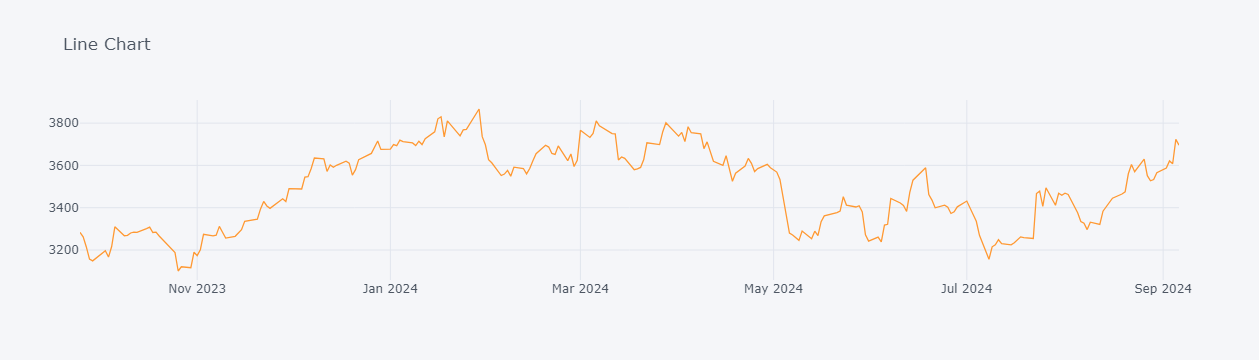

In [43]:
df['Close'].iplot(kind='line', title='Line Chart')

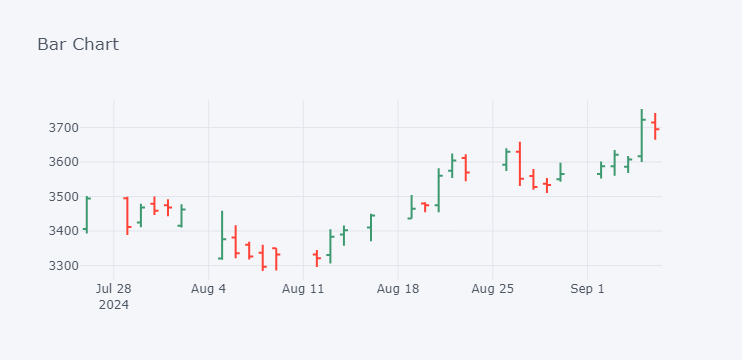

In [44]:
df[-30:].iplot(kind='ohlc', title='Bar Chart')

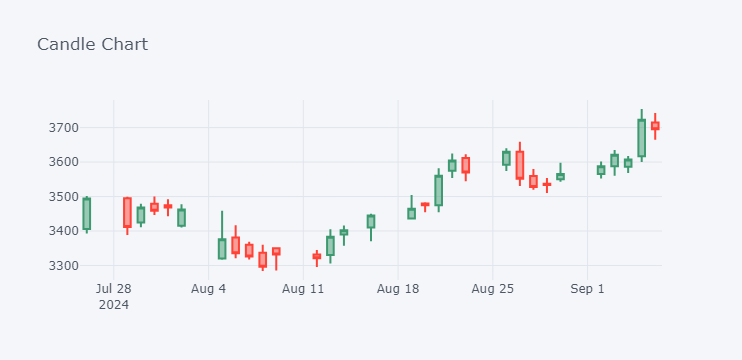

In [45]:
df[-30:].iplot(kind='candle', title='Candle Chart')

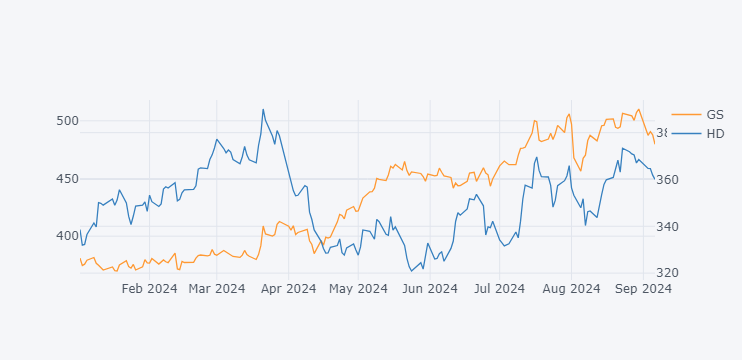

In [46]:
# Use secondary axis
df4[['GS', 'HD']].iplot(secondary_y='HD')

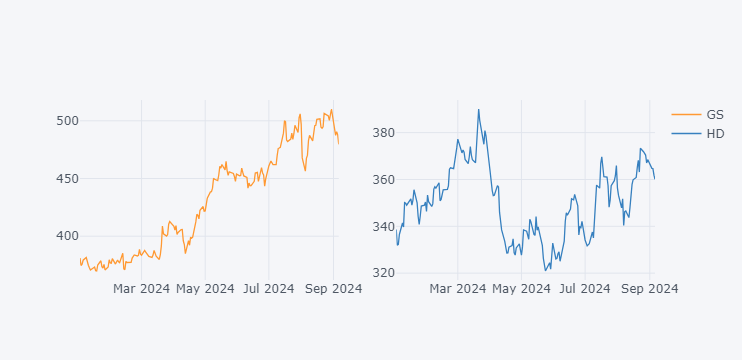

In [47]:
# Use subplots
df4[['GS', 'HD']].iplot(subplots=True)

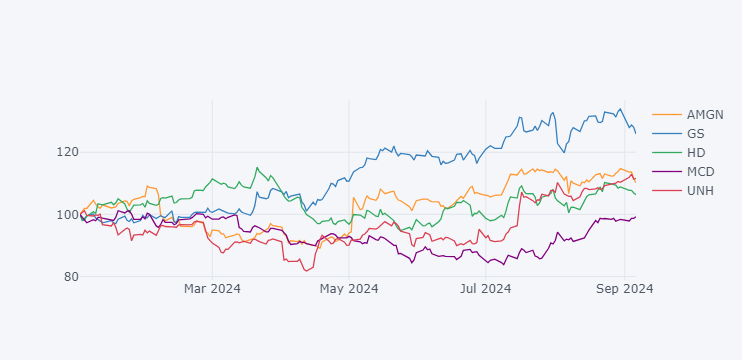

In [48]:
# Normalize plot
df4.normalize().iplot()

In [49]:
# Calculating Log Normal Returns
# Use numpy log function to derive log normal returns
daily_returns = np.log(df4).diff().dropna()

# Display the last five rows of the data frame to check the output
daily_returns.head()

Ticker,AMGN,GS,HD,MCD,UNH
Date,,,,,
2024-01-03 00:00:00+00:00,0.011035,-0.016907,-0.019961,-0.008961,0.004975
2024-01-04 00:00:00+00:00,0.008214,0.003034,0.000975,-0.009043,0.006235
2024-01-05 00:00:00+00:00,-0.000561,0.009072,0.012766,-0.009471,-0.014851
2024-01-08 00:00:00+00:00,0.025674,0.006243,0.014446,0.010019,-0.001602
2024-01-09 00:00:00+00:00,-0.011713,-0.013254,-0.005013,-0.003535,0.003442


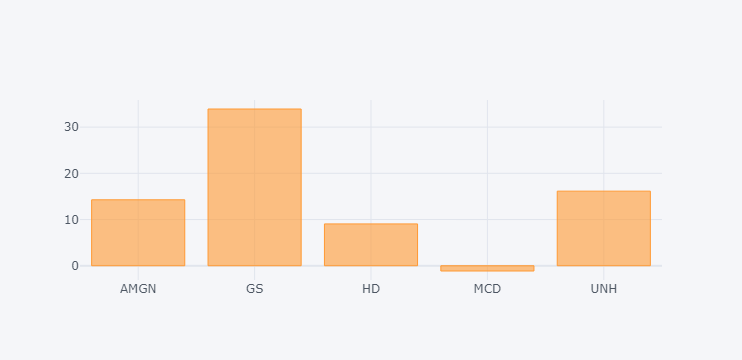

In [50]:
# Plot Mean Annual Returns
(daily_returns.mean()*252*100).iplot(kind='bar')

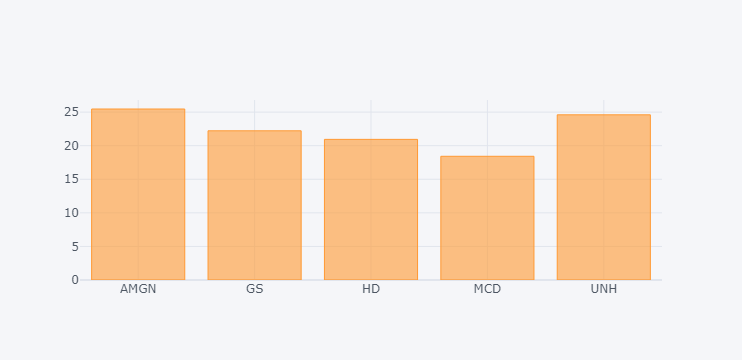

In [51]:
# Plot Mean Annualized Volatility
(daily_returns.std()*np.sqrt(252)*100).iplot(kind='bar')

In [52]:
# To calculate 5 days rolling returns, simply sum daily returns for 5 days as log returns are additive
rolling_return = daily_returns.rolling(5).sum().dropna()

# Display the last five rows of the data frame to check the output
rolling_return.head()

Ticker,AMGN,GS,HD,MCD,UNH
Date,,,,,
2024-01-09 00:00:00+00:00,0.032650,-0.011813,0.003212,-0.020991,-0.001800
2024-01-10 00:00:00+00:00,0.012821,0.000445,0.053361,-0.001020,-0.008132
2024-01-11 00:00:00+00:00,-0.000231,-0.008391,0.051628,0.008227,-0.010580
2024-01-12 00:00:00+00:00,0.011518,-0.022744,0.036560,0.015383,-0.029977
2024-01-16 00:00:00+00:00,-0.024091,-0.021865,0.029732,-0.002779,-0.032911


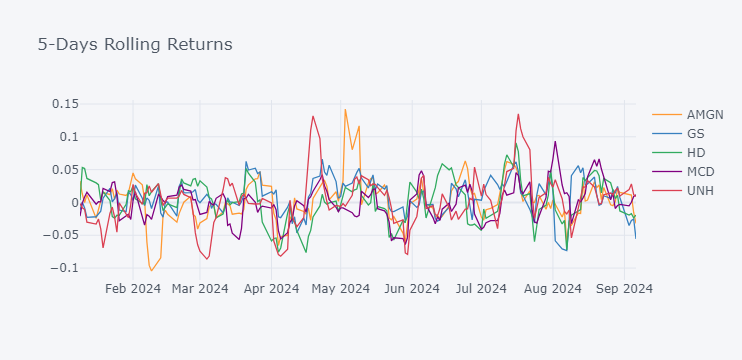

In [53]:
# Plot Rolling Returns
rolling_return.iplot(title='5-Days Rolling Returns')

Time Series Statistics

Statistics is a branch of mathematics that deals with collecting, interpreting, organization and interpretation of data. The two main categories of statistics are descriptive statistics and inferential statistics.

Descriptive statistics help us to understand the data in a meaningful way and is an important part of data analysis. While inferential statistics allows us to infer trends and derive conclusion from it.

In [54]:
# Analysing the daily returns data
daily_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AMGN,171.0,0.000566,0.016041,-0.066044,-0.006869,0.000033,0.008004,0.111702
GS,171.0,0.001346,0.013995,-0.060755,-0.006300,0.000641,0.010415,0.042565
HD,171.0,0.000359,0.013194,-0.041436,-0.008035,0.000180,0.009748,0.030188
MCD,171.0,-0.000045,0.011605,-0.039682,-0.006893,-0.000248,0.005669,0.036699
UNH,171.0,0.000641,0.015496,-0.066618,-0.006127,0.001124,0.007578,0.062977


Log Normal Distribution

A normal distribution is the most common and widely used distribution in statistics. It is popularly referred as a “bell curve” or “Gaussian curve”. Financial time series though random in short term, follows a log normal distribution on a longer time frame.

Now that we have derived the daily log returns, we will plot this return distribution and check whether the stock returns follows log normality.

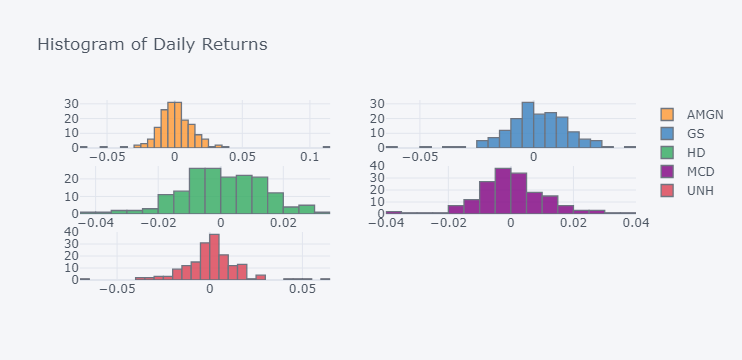

In [55]:
# Plot log normal distribution of returns
daily_returns.iplot(kind='histogram', title = 'Histogram of Daily Returns', subplots=True)


Correlation

Correlation defines the similarity between two random variables. As an example we will check correlation between our Nasdaq listed stocks.

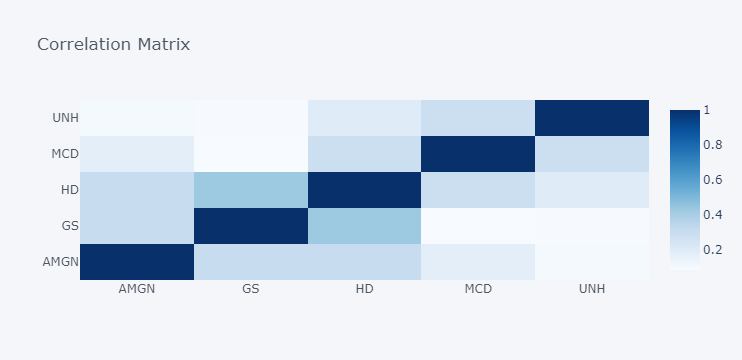

In [58]:
# Plot correlation of returns
daily_returns.corr().iplot(kind='heatmap', title="Correlation Matrix", colorscale="Blues")